In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정
sns.set(style="whitegrid")

# 데이터 로드
df = pd.read_csv("modified_h3_summary.csv")

In [13]:
df

,trial,hot_compaction,cold_compaction,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,...,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,throughput,case
0,universal,universal,universal,215.646,88822,543645,811590816,3768128779,16407028699,1911178,...,44.959654,3166763.0,1000000,213881233,213.881233,0.279132,3.021783,0.553418,7.608316e+07,1
1,universal,universal,level,309.711,88818,543256,811597848,7295480689,16407029052,1911182,...,38.848749,3797310.0,1000000,307948584,307.948584,0.494122,3.023668,0.441664,5.297529e+07,3
2,universal,universal,universal,252.733,88592,543566,811652440,3886721728,16407028784,1911408,...,37.564776,3734166.0,1000000,251054057,251.054057,0.286363,3.023624,0.552143,6.491843e+07,1
3,universal,level,level,267.389,88948,543385,811595301,7041300012,16407028895,1911052,...,33.004418,3503366.0,1000000,265712666,265.712666,0.478630,3.022224,0.454006,6.136015e+07,0
4,universal,level,universal,273.964,89077,543107,811540036,3873078173,16407028477,1910923,...,32.665415,3458730.0,1000000,272312499,272.312499,0.285525,3.022732,0.552765,5.988753e+07,2
5,universal,level,level,303.680,88748,543769,811622172,7209420559,16407028746,1911252,...,35.754415,3650556.0,1000000,302098691,302.098691,0.488878,3.021661,0.428351,5.402736e+07,0
6,universal,level,universal,435.653,88794,543040,811629101,4180097864,16407029090,1911206,...,46.817891,7401714.0,1000000,433860850,433.860850,0.304243,3.024855,0.531558,3.766077e+07,2
7,universal,universal,universal,196.579,88893,543244,811621772,3779265860,16407028558,1911107,...,32.014338,2135283.0,1000000,194934750,194.934750,0.279812,3.023248,0.553239,8.346277e+07,1
8,universal,level,universal,254.691,88746,543708,811725984,3938471118,16407028018,1911254,...,31.423313,3721982.0,1000000,253108289,253.108289,0.289522,3.021965,0.542208,6.441935e+07,2
9,universal,universal,level,334.687,89125,542997,808394069,6990263479,16407029204,1910875,...,41.330087,4920635.0,1000000,332933497,332.933497,0.475324,3.022953,0.449170,4.902201e+07,3


In [14]:
df_avg = df.groupby('case').mean(numeric_only=True).reset_index()
df_avg

,case,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,...,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,throughput
0,0,322.921333,88815.000000,543494.666667,8.116280e+08,7.204316e+09,1.640703e+10,1.911185e+06,1.035976e+10,8.195493e+06,...,14.338202,36.619839,4.820609e+06,1000000.0,321299530.0,321.299530,0.488568,3.022546,0.447845,5.221427e+07
1,1,221.652667,88769.000000,543485.000000,8.116217e+08,3.811372e+09,1.640703e+10,1.911231e+06,1.035885e+10,7.328154e+06,...,14.421036,38.179589,3.012071e+06,1000000.0,219956680.0,219.956680,0.281769,3.022885,0.552933,7.482145e+07
2,2,321.436000,88872.333333,543285.000000,8.116317e+08,3.997216e+09,1.640703e+10,1.911128e+06,1.035727e+10,7.279753e+06,...,15.092605,36.968873,4.860809e+06,1000000.0,319760546.0,319.760546,0.293097,3.023184,0.542177,5.398922e+07
3,3,284.551667,88965.000000,543120.666667,8.105732e+08,6.875254e+09,1.640703e+10,1.911035e+06,1.035609e+10,7.850243e+06,...,14.408545,36.884697,3.870956e+06,1000000.0,282862925.0,282.862925,0.468447,3.023380,0.447436,6.013447e+07


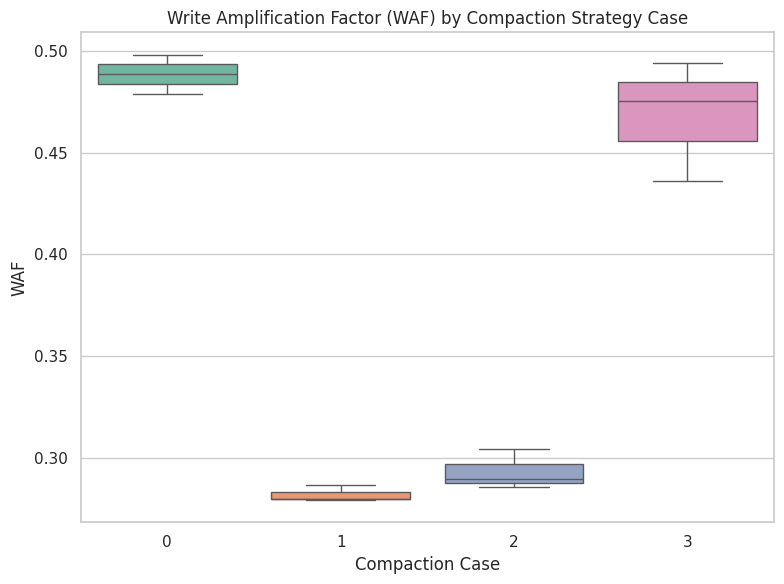

In [15]:
# ------------------------------------
# 1. WAF by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df, hue='case', palette='Set2', legend=False)

plt.title('Write Amplification Factor (WAF) by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('WAF')
plt.tight_layout()
plt.show()

/tmp/ipykernel_18394/2909625850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_avg, palette='Set2')


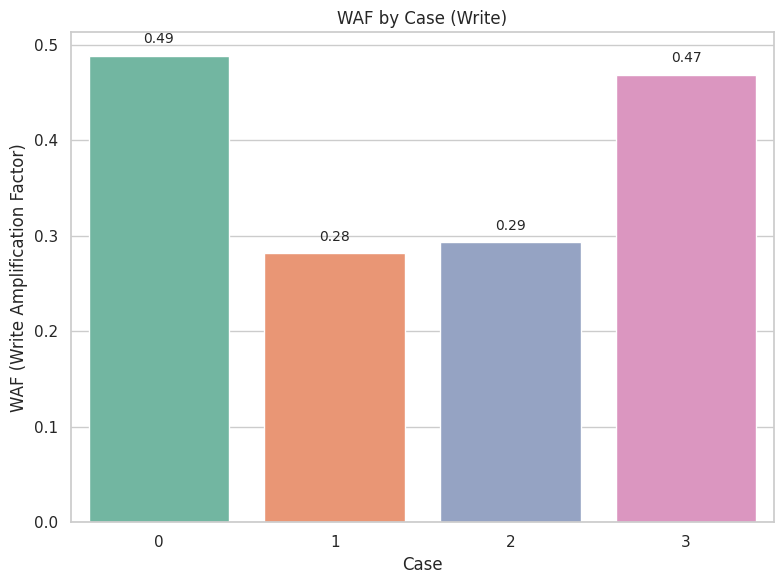

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [69]:
df.groupby('case')['WAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.488568,0.009786,0.478630,0.483754,0.488878,0.493536,0.498195
1,3.0,0.281769,0.003993,0.279132,0.279472,0.279812,0.283088,0.286363
2,3.0,0.293097,0.009858,0.285525,0.287524,0.289522,0.296883,0.304243
3,3.0,0.468447,0.029716,0.435895,0.455610,0.475324,0.484723,0.494122


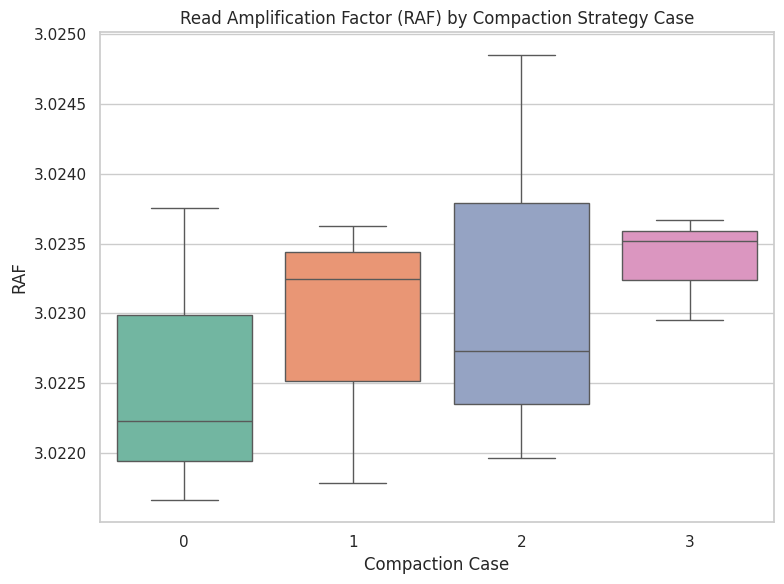

In [70]:
# ------------------------------------
# RAF by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df, hue='case', palette='Set2', legend=False)

plt.title('Read Amplification Factor (RAF) by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('RAF')
plt.tight_layout()
plt.show()

/tmp/ipykernel_16987/597892898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_avg, palette='Set2')


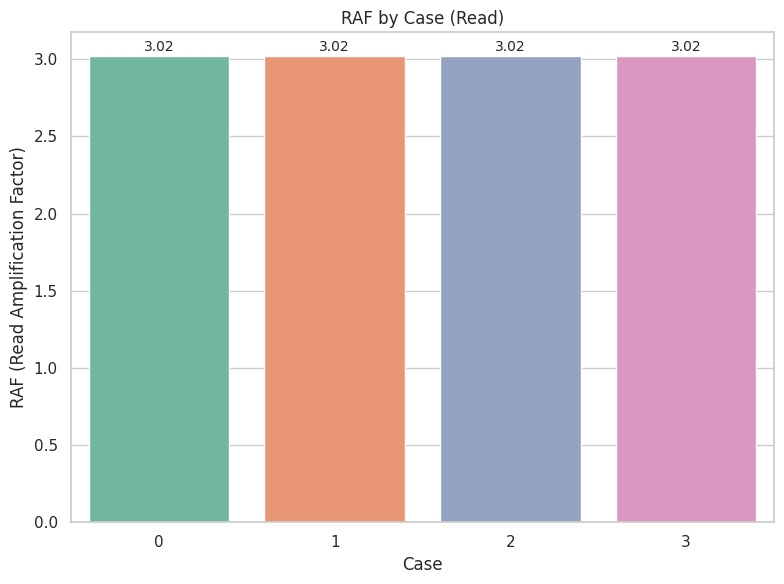

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

In [72]:
df.groupby('case')['RAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,3.022546,0.001083,3.021661,3.021943,3.022224,3.022989,3.023753
1,3.0,3.022885,0.000973,3.021783,3.022516,3.023248,3.023436,3.023624
2,3.0,3.023184,0.001497,3.021965,3.022349,3.022732,3.023793,3.024855
3,3.0,3.023380,0.000377,3.022953,3.023236,3.023518,3.023593,3.023668


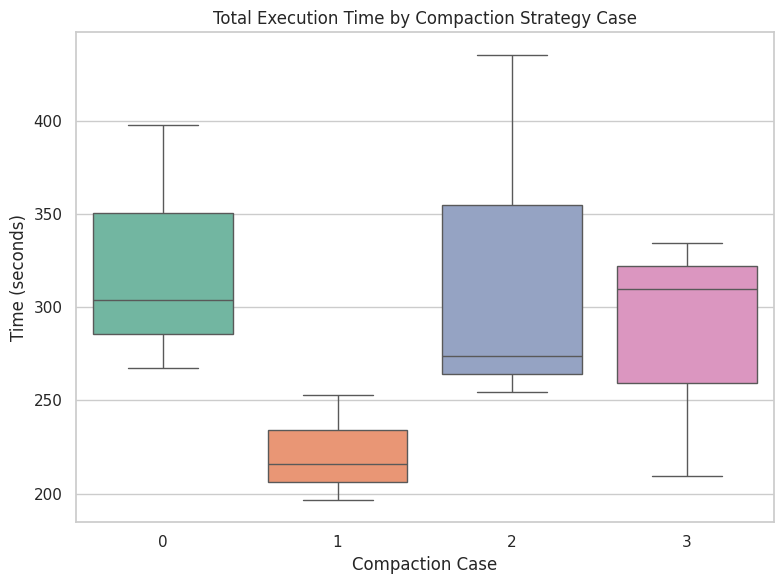

In [73]:
# ------------------------------------
# 2. 총 소요시간 by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_16987/553514591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_avg, palette='Set2')


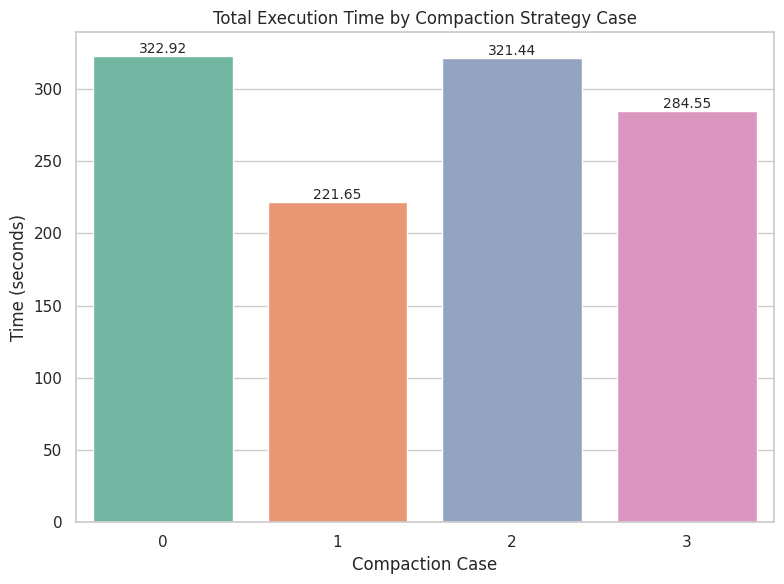

In [74]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [75]:
df.groupby('case')['time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,322.921333,67.250168,267.389,285.5345,303.680,350.6875,397.695
1,3.0,221.652667,28.554824,196.579,206.1125,215.646,234.1895,252.733
2,3.0,321.436000,99.383120,254.691,264.3275,273.964,354.8085,435.653
3,3.0,284.551667,66.392133,209.257,259.4840,309.711,322.1990,334.687


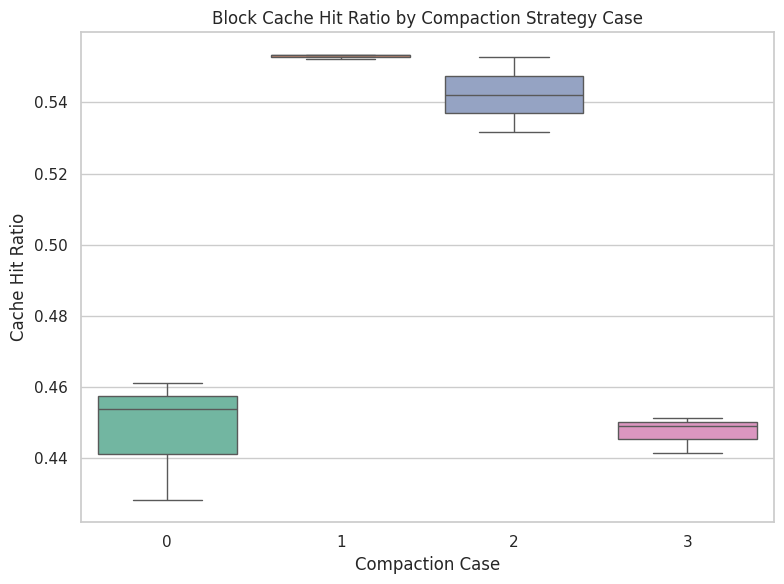

In [76]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------

plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_16987/2385380408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_avg, palette='Set2')


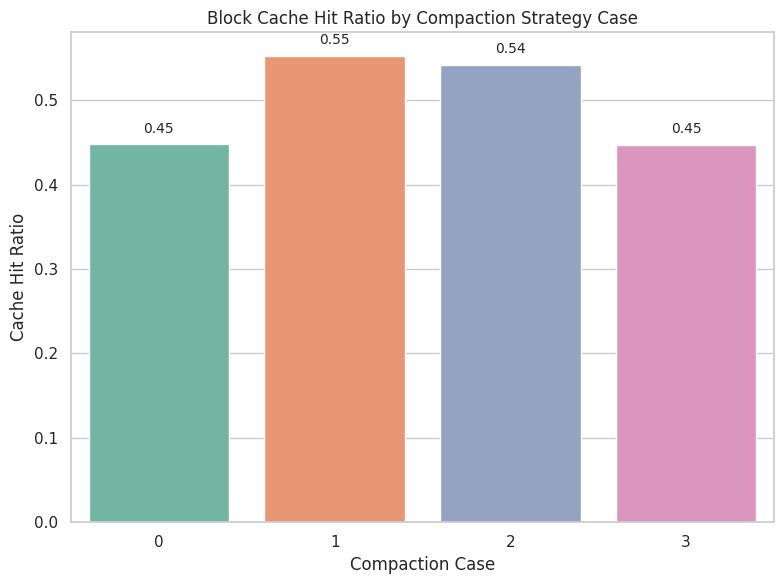

In [77]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [78]:
df.groupby('case')['cache_hit_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.447845,0.017259,0.428351,0.441178,0.454006,0.457592,0.461179
1,3.0,0.552933,0.000690,0.552143,0.552691,0.553239,0.553328,0.553418
2,3.0,0.542177,0.010604,0.531558,0.536883,0.542208,0.547486,0.552765
3,3.0,0.447436,0.005130,0.441664,0.445417,0.449170,0.450322,0.451475


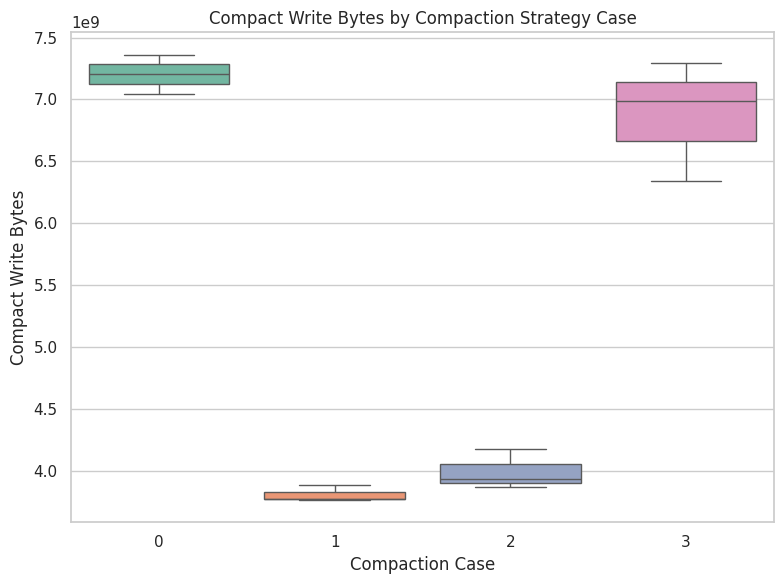

In [79]:
# ------------------------------------
# 4. Compact Write Bytes by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compact.write.bytes', data=df, hue='case', palette='Set2', legend=False)
plt.title('Compact Write Bytes by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Compact Write Bytes')
plt.tight_layout()
plt.show()


In [80]:
df.groupby('case')['rocksdb.compact.write.bytes'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,7.204316e+09,1.605239e+08,7.041300e+09,7.125360e+09,7.209421e+09,7.285823e+09,7.362226e+09
1,3.0,3.811372e+09,6.549184e+07,3.768129e+09,3.773697e+09,3.779266e+09,3.832994e+09,3.886722e+09
2,3.0,3.997216e+09,1.617203e+08,3.873078e+09,3.905775e+09,3.938471e+09,4.059284e+09,4.180098e+09
3,3.0,6.875254e+09,4.880044e+08,6.340017e+09,6.665140e+09,6.990263e+09,7.142872e+09,7.295481e+09


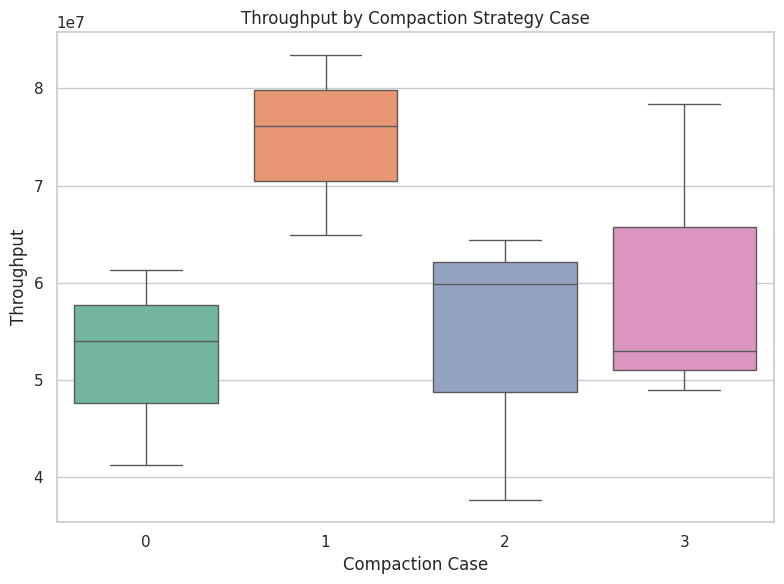

In [85]:
# ------------------------------------
# 1. Throughput by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df, hue='case', palette='Set2', legend=False)

plt.title('Throughput by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Throughput')
plt.tight_layout()
plt.show()

/tmp/ipykernel_16987/2570657693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_avg, palette='Set2')


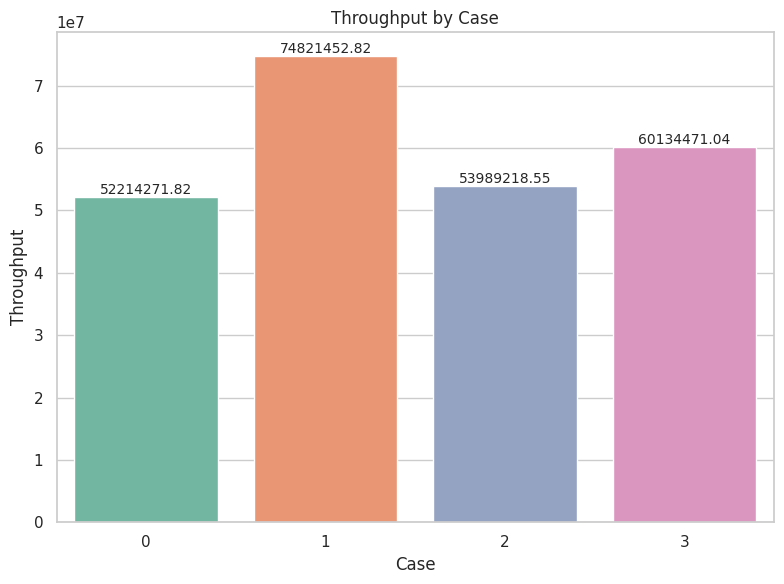

In [86]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

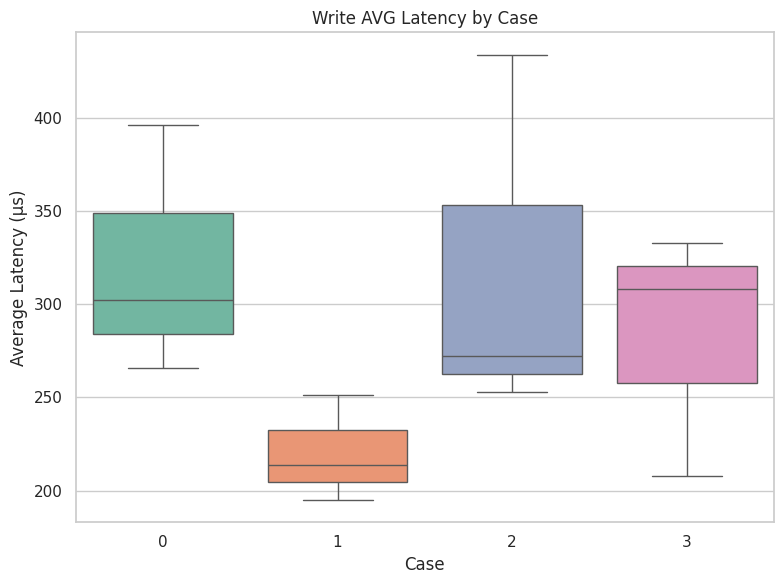

In [17]:
# ------------------------------------
# 1. Throughput by Compaction Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df, hue='case', palette='Set2', legend=False)

plt.title('Write AVG Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_18394/2470653533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_avg, palette='Set2')


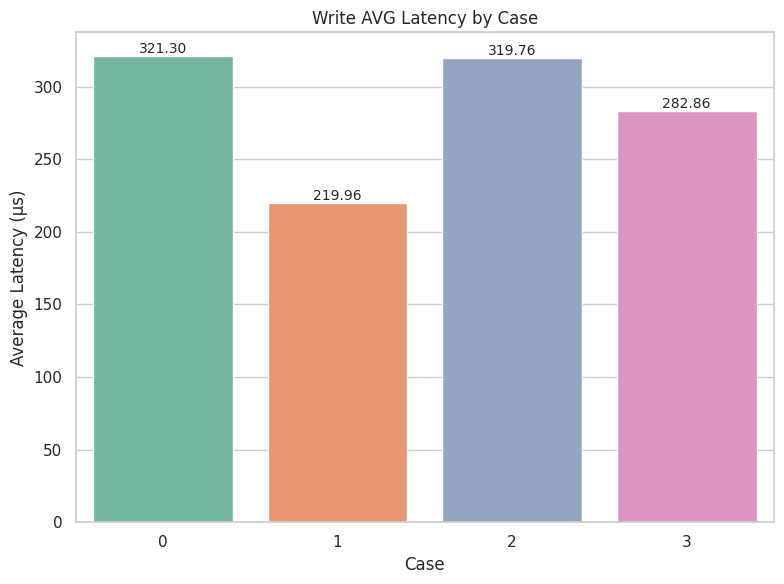

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write AVG Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()